In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from motion_pred_clustbased.data_analysis.assert_transforms import Plotter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
CFG = "motion_pred_clustbased/cfg/data_analysis/benchmark.yaml"

In [3]:
with open(CFG, "r") as f:
    cfg = yaml.safe_load(f)

In [4]:
pl = Plotter(cfg=cfg)

In [5]:
pl.loading_files()

In [13]:
ds = pl.data["train_raw.pkl"]
disp_ds = pl.data["train_vect_dir.pkl"]

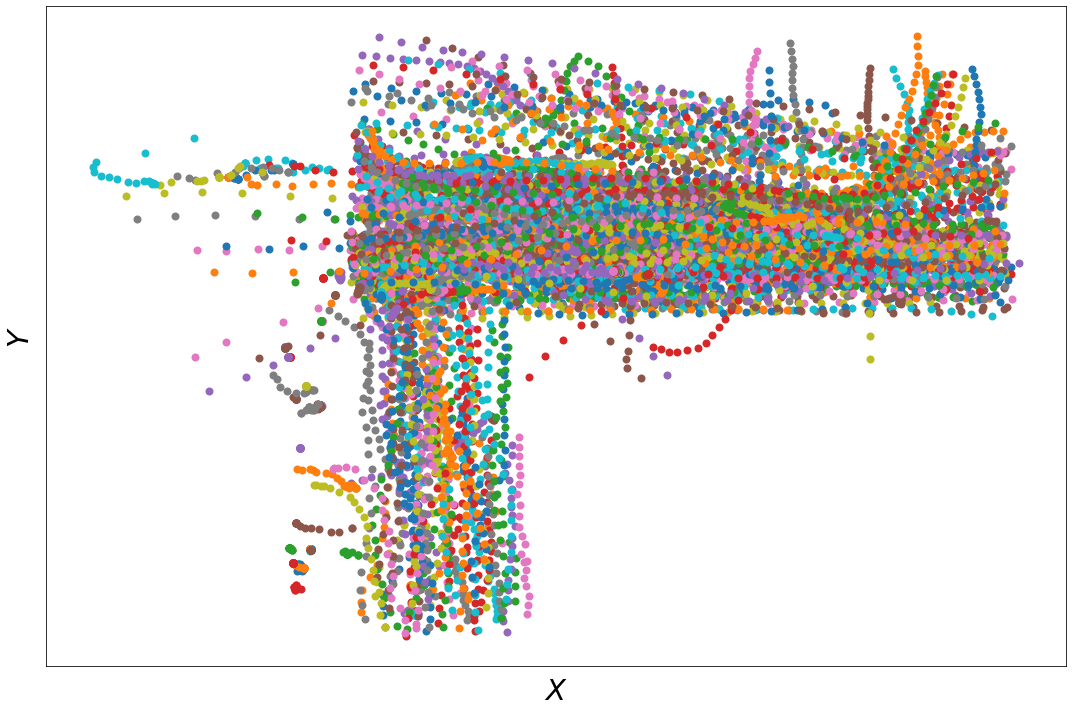

In [34]:
plt.figure(figsize=(15,10));
plt.tick_params(bottom = False, left=False)
for trajectory in ds:
    plt.scatter(trajectory[ :, 0], trajectory[ :, 1], linewidth = 2)
plt.xlabel("$X$", fontsize=29);
plt.ylabel("$Y$", fontsize=29);
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tight_layout();
plt.savefig("/home/tmr/Pictures/ICTS23/input_ds.svg")

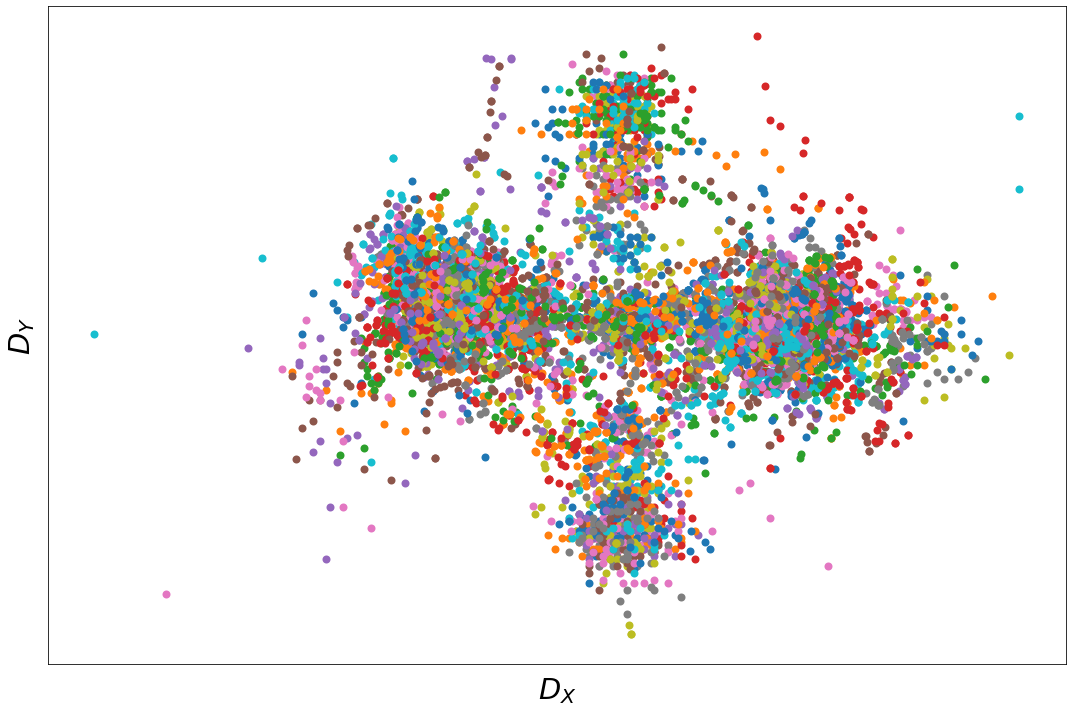

In [35]:
plt.figure(figsize=(15,10));
plt.tick_params(bottom = False, left=False)
for disp_set in disp_ds:
    plt.scatter(disp_set[ :, 0], disp_set[ :, 1], linewidth = 2)
plt.xlabel("$D_X$", fontsize=29);
plt.ylabel("$D_Y$", fontsize=29);
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tight_layout();
plt.savefig("/home/tmr/Pictures/ICTS23/input_disp_ds.svg")

In [38]:
n_init = 10
max_iter = 300

In [39]:
clustering = KMeans(n_clusters = 5, 
        init = "k-means++",
        n_init = n_init,
        max_iter = max_iter,
        random_state = 42)

In [42]:
disp_ds = np.stack(disp_ds, axis=0)
disp_ds = disp_ds.reshape(disp_ds.shape[0], -1)


In [43]:
disp_ds.shape

(783, 40)

In [44]:
clusterer_fitted = clustering.fit(disp_ds)

In [48]:
labels = clusterer_fitted.labels_

In [69]:
colors = {
    0 : "red", 
    1: "green",
    2: "blue", 
    3: "yellow",
    4: "magenta"
}

In [70]:
disp_set.shape

(20, 2)

In [71]:
centroids = clusterer_fitted.cluster_centers_

In [72]:
centroids.shape

(5, 40)

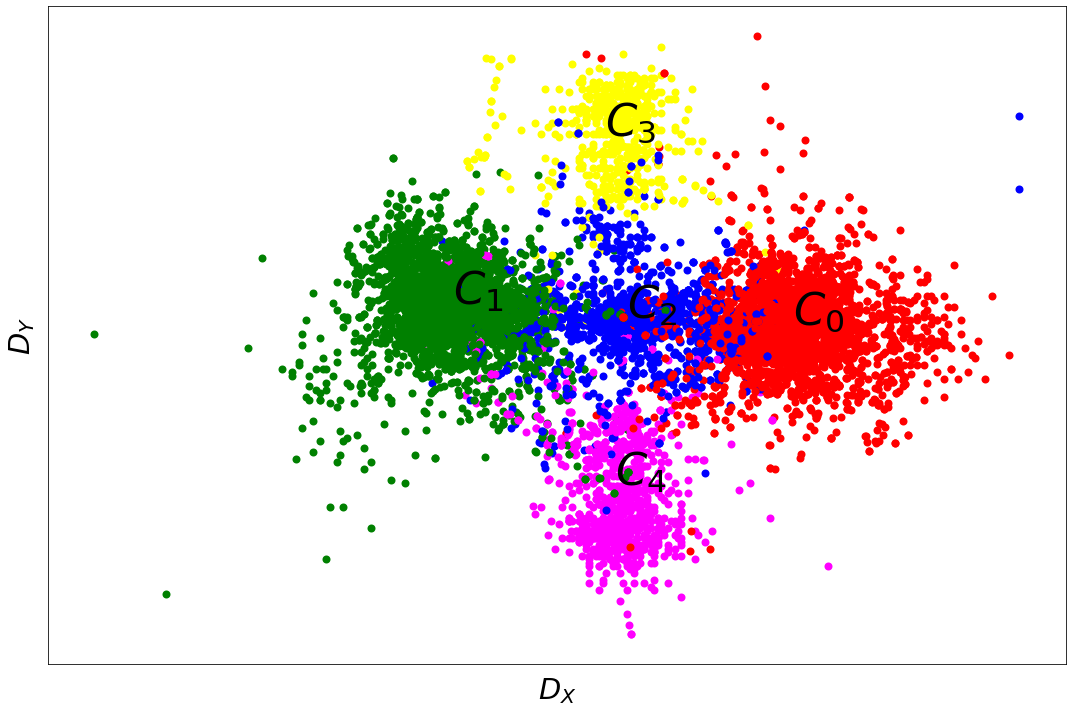

In [75]:
plt.figure(figsize=(15,10));
plt.tick_params(bottom = False, left=False)
for disp_set, label in zip(disp_ds, labels):
    disp_set = disp_set.reshape(20, 2)
    plt.scatter(disp_set[ :, 0], disp_set[ :, 1], linewidth = 2, color=colors[label])
for i, centroid in enumerate(centroids):
    centroid = centroid.reshape(20, 2)
    plt.text(centroid[10, 0], centroid[10, 1], f"$C_{i}$", c = "black", fontsize = 45)
plt.xlabel("$D_X$", fontsize=29);
plt.ylabel("$D_Y$", fontsize=29);
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tight_layout();
plt.savefig("/home/tmr/Pictures/ICTS23/clusters.svg")